In [1]:
!pip install gurobipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.9 MB 10.4 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:

import os
import sys
# path = os.path.dirname(os.getcwd())
# sys.path.insert(0, path)

sys.path.append('/content/gdrive/MyDrive/SVR_Codes/SVR_CG')
from Codes.model import *
from Codes.utils import *

from scipy import stats
import pickle
sys.path.append('/content/gdrive/MyDrive/SVR_Codes/DatasetsResult')
RESULT_DIR = "/content/gdrive/MyDrive/SVR_Codes/DatasetsResult"

sys.path.append('/content/gdrive/MyDrive/SVR_Codes/Datasets')
DATA_DIR = "/content/gdrive/MyDrive/SVR_Codes/Datasets"

sys.path.append('/content/gdrive/MyDrive/SVR_Codes/DatasetsInfo')
DATAINFO_DIR = "/content/gdrive/MyDrive/SVR_Codes/DatasetsInfo"

import warnings
warnings.filterwarnings("ignore")

from sklearn import datasets

from sklearn.preprocessing import StandardScaler



In [ ]:
df = pd.read_csv(os.path.join(DATA_DIR, 'CASP.csv')) 


In [ ]:
df

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147
...,...,...,...,...,...,...,...,...,...,...
45725,3.762,8037.12,2777.68,0.34560,64.3390,1.105797e+06,112.7460,3384.21,84,36.8036
45726,6.521,7978.76,2508.57,0.31440,75.8654,1.116725e+06,102.2770,3974.52,54,36.0470
45727,10.356,7726.65,2489.58,0.32220,70.9903,1.076560e+06,103.6780,3290.46,46,37.4718
45728,9.791,8878.93,3055.78,0.34416,94.0314,1.242266e+06,115.1950,3421.79,41,35.6045


In [4]:
df = pd.read_csv(os.path.join(DATA_DIR, 'CASP.csv')) 

f = 9
K = 2
X = df.iloc[:,1:f+1]
y = df.iloc[:,0:1]

cols = [ 'X' + str(i+1) for i in range(f) ]
cols+=['Y']

scaler = StandardScaler()
df_data = scaler.fit_transform(np.c_[X,y])
df_data = pd.DataFrame(df_data, columns = cols)



In [ ]:
df_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y
0,0.908481,0.879584,0.240885,1.058750,0.894440,0.996035,0.149539,0.566885,-1.253153,1.558531
1,-0.906740,-0.952127,-0.640245,-0.903989,-1.001457,-0.834813,-0.331492,-0.548301,0.672800,-0.282357
2,-0.528725,-0.881704,-1.255652,-0.653210,-0.518857,-0.912117,-0.505989,-0.725315,0.717134,0.249495
3,-0.356576,-0.443293,-0.338425,-0.643398,-0.279821,-0.517141,-0.371967,0.000441,0.759477,1.324313
4,-0.594061,-0.874424,-1.106651,-0.921619,-0.615710,-0.730225,-0.589569,-0.512898,0.901558,0.034891
...,...,...,...,...,...,...,...,...,...,...
45725,-0.452054,-0.163686,0.687096,-0.706430,-0.465404,-0.469897,-0.303752,0.248260,0.381280,-0.651580
45726,-0.466435,-0.347466,0.190953,-0.498464,-0.446029,-0.619457,-0.007643,-0.282781,0.254752,-0.200634
45727,-0.528560,-0.360434,0.314989,-0.586423,-0.517239,-0.599443,-0.350779,-0.424391,0.493025,0.426180
45728,-0.244614,0.026233,0.664197,-0.170702,-0.223451,-0.434910,-0.284901,-0.512898,0.180751,0.333833


In [ ]:

# EM Greedy

weights_list_greedy = []
bias_list_greedy = []
metrics_list = []
time_list=[]
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)
    greedy = CLR(K =K , f = f, max_iter= 30, compute = True, random_state=seed )
    greedy.set_model(Cl_SVR_greedy(Kmeans_init = False, outputFlag=False, tol = 0.05, time = 0.5, step_plots=False))

    greedy.fit(df_data )


    time_list.append(greedy.run_time) 
    epsVal_list.append(greedy.model_optVal)
    weights_list_greedy.append(greedy.weights)
    bias_list_greedy.append(greedy.bias)


print("\n\nResults for EM Greedy" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_greedy = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for EM Greedy: ", epsVal_result_greedy)


time_result_greedy = np.mean(time_list)
print("Average time taken for EM Greedy ", time_result_greedy, "\n")

Clusterwise-Regression model with SVR - Greedy algorithm
# of outliers:  0
Iteration:  0
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 30
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 30
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w:  [[-0.00460032  0.00213626 -0.00072372 -0.00068314  0.00267415 -0.00022388
  -0.00057089  0.00099485 -0.00036752]
 [ 0.00766699 -0.00037933  0.00014919 -0.00010496 -0.00526224 -0.00132799
  -0.00200387 

In [ ]:

# KM LR Greedy

weights_list_kmlr = []
bias_list_kmlr = []
time_list=[]
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)

    kmlr = CLR(K =K , f = f, random_state=seed )
    kmlr.set_model(km_lr())
    kmlr.fit(df_data )

    time_list.append(kmlr.run_time) 
    epsVal_list.append(kmlr.model_optVal)
    weights_list_kmlr.append(kmlr.weights)
    bias_list_kmlr.append(kmlr.bias)


print("\n\nResults for kmlr" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kmlr = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for kmlr: ", epsVal_result_kmlr)


time_result_kmlr = np.mean(time_list)
print("Average time taken for kmlr ", time_result_kmlr, "\n")

Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  3.9356386428924903
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  3.9356386428924903
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  3.9356386428924903
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  3.9356386428924903
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  3.9356386428924903
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  3.9356386428924903
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  3.9356386428924903
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  3.9356386428924903
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  3.9356386428924903
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  3.9355221098089723


Results for kmlr



In [ ]:

# KM SVR Greedy

weights_list_kmsvr = []
bias_list_kmsvr = []
metrics_list = []
time_list=[]
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)
    print(seed)
    kmsvr = CLR(K =K , f = f, random_state=seed )
    kmsvr.set_model(km_svr(epsilon = 4))
    kmsvr.fit(df_data )

    time_list.append(kmsvr.run_time) 
    epsVal_list.append(kmsvr.model_optVal)
    weights_list_kmsvr.append(kmsvr.weights)
    bias_list_kmsvr.append(kmsvr.bias)


print("\n\nResults for kmsvr" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kmsvr = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for kmsvr ", epsVal_result_kmsvr)


time_result_kmsvr = np.mean(time_list)
print("Average time taken for kmsvr ", time_result_kmsvr, "\n")

147
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  1.7160967531092168
163
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  1.7160967531092168
49
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  1.7160967531092168
8
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  1.7160967531092168
41
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  1.7160967531092168
108
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  1.7160967531092168
178
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  1.7160967531092168
61
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  1.7160967531092168
167
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  1.7160967531092168
161
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxEr

In [5]:

# KM et Greedy

weights_list_kmet = []
bias_list_kmet = []
metrics_list = []
time_list=[]
epsVal_list = []


for j in range(10):
    seed = np.random.randint(2**8)
    print(seed)
    kmet = CLR(K =K , f = f, compute = True, random_state=seed )
    kmet.set_model(km_et(outputFlag= False))
    kmet.fit(df_data )

    time_list.append(kmet.run_time) 
    epsVal_list.append(kmet.model_optVal)
    weights_list_kmet.append(kmet.weights)
    bias_list_kmet.append(kmet.bias)


print("\n\nResults for kmet" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kmet = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for kmet ", epsVal_result_kmet)


time_result_kmet = np.mean(time_list)
print("Average time taken for kmet ", time_result_kmet, "\n")




with open(os.path.join(RESULT_DIR, 'Protein3.pkl'), 'wb') as outp:

    pickle.dump(weights_list_kmet, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kmet, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kmet, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kmet, outp, pickle.HIGHEST_PROTOCOL)



105
Clusterwise-Regression model with Kmeans-et
# of outliers:  0
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w:  [[-0.00767924  0.00045015 -0.00019882  0.00040486  0.00713552  0.00040448
  -0.00163775  0.00030013 -0.00048009]
 [ 0.0105098  -0.00241777  0.00198817 -0.00098381 -0.00664866 -0.00238992
  -0.00021579  0.00065366 -0.0002668 

In [ ]:

# kplane Greedy

weights_list_kp = []
bias_list_kp = []
time_list = []
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)

    kp = CLR(K =K , f = f, max_iter= 20, random_state=seed )
    kp.set_model(k_plane())
    kp.fit(df_data )

    time_list.append(kp.run_time) 
    epsVal_list.append(kp.model_optVal)
    weights_list_kp.append(kp.weights)
    bias_list_kp.append(kp.bias)


print("\n\nResults for k plane" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kp = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for k plane: ", epsVal_result_kp)


time_result_kp = np.mean(time_list)
print("Average time taken for k plane ", time_result_kp, "\n")

Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.9272249406316562
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.9295306997359294
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  3.061297148048766
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  3.049186884545536
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.927299130631154
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.9508538356087184
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.9508538356087184
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.9508538356087184
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.9273567776748153
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.9508538356087184


Results for k plane



In [ ]:

# Clusterwise SVR with constraint generation 

optcg = CLR(K =K , f = f, max_iter= 50, compute = True, random_state=243)
optcg.set_model(Cl_SVR_Cg(outputFlag=False, initConstrCnt=36, optimalGap= 0.05, tol = 0.3, time = 2, initConstrIntRatio= 4, outliersCnt = 0, step_plots=False))

optcg.fit(df_data )


weights_optcg = optcg.weights
bias_optcg = optcg.bias
optgap_optcg = optcg.model_optGap
optVal_optcg = optcg.model_optVal


print("\n\nResults for CG" )

print("EpsVal for CG: ", optVal_optcg)

time_result_optcg = optcg.run_time
print("Time taken for CG ", time_result_optcg, "\n")


Clusterwise-Regression model with SVR - Constraint generation
# of outliers:  0
greedy objective:  0.2770937705761552
greedy objective:  0.2770937705761552
greedy objective:  0.6809898910581852
greedy objective:  0.6828776469811773
greedy objective kmlr:  0.6884644418440627
Max error for warm starting model:  1.9508538356087184
Number of WS constraints:  90
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w at WS:  [[ 0.60316436 -0.08714962  0.09309838 -0.24305495 -0.29936271  0.12183242
  -0.03093663  0.07027864 -0.1681436 ]
 [ 0.74140806  0.18253654  0.0391995  -0.28744028 -0.56063311 -0.04854314
  -0.04402622  0.00695996 -0.04598967]]
b at WS:  [[ 1.14531744]
 [-0.67901198]]
Set parameter TimeLimit to value 120
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w:  [[ 1

Clusterwise-Regression model with SVR - MILP
# of outliers:  0
greedy objective:  0.2770937705761552
greedy objective:  0.27681148953010054
greedy objective:  0.680988616469349
greedy objective:  0.6827258322454312
greedy objective kmlr:  0.6884644418440627
Max error for warm starting model:  1.9272249406316562
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w at WS:  [[ 0.59269405 -0.0920892   0.09376561 -0.23429481 -0.29994213  0.11869089
   0.01007204  0.0704461  -0.15601804]
 [ 0.72769311  0.18010931  0.04057954 -0.27716106 -0.55886418 -0.05385534
  -0.01406489  0.00616093 -0.03969485]]
b at WS:  [[ 1.14742319]
 [-0.679151  ]]
Set parameter TimeLimit to value 600
Set parameter MIPGap to value 0.1
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
E:  1.716046629535065


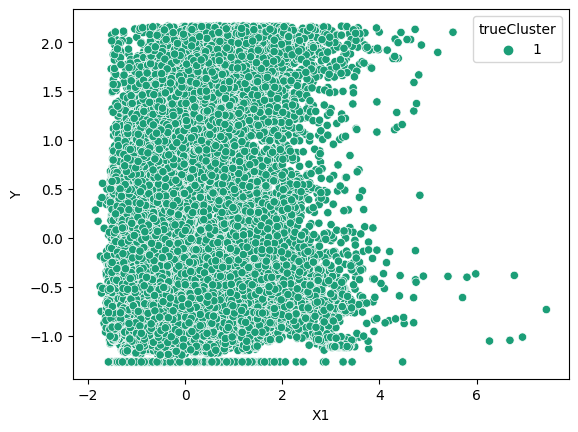

In [ ]:

# Clusterwise SVR with full MILP

optmilp = CLR(K =K , f = f,compute = True, random_state=243)
optmilp.set_model(Cl_SVR_milp(outputFlag=False, WarmStart=True, optimalGap= 0.1, time = 10))

optmilp.fit(df_data )

weights_optmilp = optmilp.weights
bias_optmilp = optmilp.bias
optgap_optmilp= optmilp.model_optGap
optVal_optmilp = optmilp.model_optVal


print("\n\nResults for full MILP" )

print("EpsVal for full MILP: ", optVal_optmilp)

time_result_optmilp = optmilp.run_time
print("Time taken for full MILP ", time_result_optmilp, "\n")


Clusterwise-Regression model with SVR - MILP
# of outliers:  0
greedy objective kmlr:  0.6884644418440627
Best WS is kmlr
Max error for warm starting model:  3.9356386428924903
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w at WS:  [[ 0.83711621 -0.84319837  0.96862748 -0.7858865   0.71083572 -0.24623812
  -0.02986182  0.09380832 -0.03129486]
 [ 2.23902026  1.06729752 -0.06614973 -1.34091212 -1.68788302 -0.47353456
  -0.13010609  0.22872629 -0.13808288]]
b at WS:  [[-0.01587262]
 [-0.00599046]]
Set parameter TimeLimit to value 3003.8264
Set parameter MIPGap to value 0.1
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
E:  1.7160460000318283


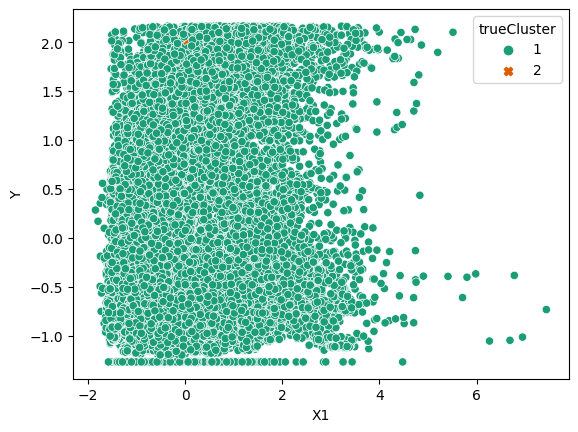

In [ ]:

# Clusterwise SVR with full MILP (time of cg)
time_result_optcg = 3003.8264
optmilp = CLR(K =K , f = f,compute = True, random_state=243)
optmilp.set_model(Cl_SVR_milp(outputFlag=False, WarmStart=True, optimalGap= 0.1, time = time_result_optcg/60))

optmilp.fit(df_data )

weights_optmilp = optmilp.weights
bias_optmilp = optmilp.bias
optgap_optmilp= optmilp.model_optGap
optVal_optmilp = optmilp.model_optVal


print("\n\nResults for full MILP" )

print("EpsVal for full MILP: ", optVal_optmilp)

time_result_optmilp = optmilp.run_time
print("Time taken for full MILP ", time_result_optmilp, "\n")


In [ ]:


with open(os.path.join(RESULT_DIR, 'Protein2.pkl'), 'wb') as outp:

    pickle.dump(weights_list_kmsvr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kmsvr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kmsvr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kmsvr, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optVal_optmilp, outp, pickle.HIGHEST_PROTOCOL)


In [ ]:

# Save the final results 


with open(os.path.join(RESULT_DIR, 'Protein.pkl'), 'wb') as outp:



    pickle.dump(weights_list_greedy, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_greedy, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_greedy, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_greedy, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_list_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    
    pickle.dump(weights_list_kp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kp, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optVal_optcg, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optVal_optmilp, outp, pickle.HIGHEST_PROTOCOL)



n, d = X.shape

with open(os.path.join(DATAINFO_DIR, 'Protein.pkl'), 'wb') as outp:

    pickle.dump(n, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(d, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(K, outp, pickle.HIGHEST_PROTOCOL)

